In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv')
df_session=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/session_pre.csv')



FileNotFoundError: [Errno 2] File /Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv does not exist: '/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv'

In [180]:
df_session=df_session.drop(['Unnamed: 0'],axis=1)

In [181]:
df=df.drop(['Unnamed: 0'],axis=1)

In [182]:
df_session.rename(columns={"user_id":"id"},inplace=True)

In [183]:
df_target=df[['id','cat_duration']]

In [184]:
df_target

id cat_duration
0      87mebub9p4            S
1      osr2jwljor            F
2      lsw9q7uk0j            S
3      0d01nltbrs            S
4      a1vcnhxeij            S
...           ...          ...
86955  7plqriggxp            F
86956  msucfwmlzc            S
86957  omlc9iku7t            S
86958  0k26r3mir0            S
86959  qbxza0xojf            F

[86960 rows x 2 columns]

In [185]:
# 나중에 두가지 그룹으로 분류 하는데 그때 쓰기 위해 
merge_left = pd.merge(df_session,df_target, how='left', left_on='id', right_on='id')



In [186]:
merge_left.isnull().sum()

id                     0
action                 0
device_type            0
secs_elapsed           0
action_type            0
action_detail          0
cat_duration     7902887
dtype: int64

In [187]:
merge_left=merge_left.dropna()

In [188]:
merge_left.isnull().sum()

id               0
action           0
device_type      0
secs_elapsed     0
action_type      0
action_detail    0
cat_duration     0
dtype: int64

In [189]:
is_s=merge_left['cat_duration']=='S'
is_f=merge_left['cat_duration']=='F'

In [190]:
# 나중에 중요하다. 
subset_s = merge_left[is_s]
subset_f = merge_left[is_f]

In [191]:
# 어떠한 detail action을 사용할지 결정 
# 2.3.2. 차집합을 이용한 ‘Anti join’ 방법 
subset_s1= pd.DataFrame(subset_s.action_detail.value_counts(sort=True))
subset_f1= pd.DataFrame(subset_f.action_detail.value_counts(sort=True))


In [192]:
list_s=subset_s1.head(50).index

In [193]:
list_f=subset_f1.head(50).index

In [194]:
#중복된거 뺀다.
re_s=list_s.difference(list_f)

In [195]:
#중복된거 뺀다. 
re_f=list_f.difference(list_s)

In [196]:
#action_detail top 50개중 Slow 그룹이 주로 하는 detail들이다 .
re_s

Index(['list_your_space', 'listing_recommendations', 'listing_reviews_page',
       'manage_listing', 'signup', 'update_listing_description', 'wishlist'],
      dtype='object')

In [197]:
# action_detail top 50개중 Fast 그룹이 주로 하는 detail들이다 .
# 결론적으로 fast 사람과 slow 사람이 주로 하는 행동의 차이점을 알수 있다. 
re_f

Index(['apply_coupon', 'at_checkpoint', 'message_to_host_focus', 'p4',
       'pending', 'post_checkout_action', 'request_new_confirm_email'],
      dtype='object')

In [198]:
# 2.3.4. 각 그룹 별 유의한 차이의 횟수를 가진 행동들에 대한 선별
mean_s=subset_s1['action_detail'].values.mean()
mean_f=subset_f1['action_detail'].values.mean()
subset_s1['average_divide']=0


In [199]:
mean_s

9966.683333333332

In [200]:
subset_f1['average_divide']=0
subset_s1=subset_s1.astype({'action_detail':'float'})
subset_f1=subset_f1.astype({'action_detail':'float'})
subset_s1['average_divide']=subset_s1['action_detail']/mean_s
subset_f1['average_divide']=subset_f1['action_detail']/mean_f
sub=subset_s1-subset_f1

In [201]:
sub

action_detail  average_divide
-unknown-                           -57894.0       -6.365206
account_notification_settings        -1313.0       -0.142238
account_payout_preferences             112.0        0.010061
account_privacy_settings               -40.0       -0.004533
account_transaction_history           -132.0       -0.014136
...                                      ...             ...
wishlist_content_update              22636.0        1.962591
wishlist_note                          145.0        0.014189
your_listings                         1567.0        0.150674
your_reservations                       13.0        0.001092
your_trips                           -8586.0       -0.899106

[126 rows x 2 columns]

In [202]:
sub.loc[(sub.average_divide<1) & (sub.average_divide>-1), 'average_divide'] = np.nan
sub.dropna(subset=['average_divide'],inplace=True)


In [203]:
sub

action_detail  average_divide
-unknown-                     -57894.0       -6.365206
message_post                   -9677.0       -1.039409
message_thread                -20490.0       -2.167892
p3                             45597.0        3.964493
p5                            -19283.0       -2.006092
update_listing                 27834.0        2.765159
view_search_results            50353.0        4.490416
wishlist_content_update        22636.0        1.962591

In [204]:
detail_s=['p3','update_listing','view_search_result','wishlist_content_update']
detail_f=['-unknown-','message_post','message_thread']





In [205]:
subset_s1.loc[subset_s1.average_divide <=0.5, 'average_divide'] = np.nan
subset_s1.dropna(subset=['average_divide'],inplace=True)

In [206]:
subset_f1.loc[subset_f1.average_divide <=0.5, 'average_divide'] = np.nan
subset_f1.dropna(subset=['average_divide'],inplace=True)


In [207]:
sel_s1=subset_s1.index

In [208]:
sel_f1=subset_f1.index

In [209]:
rem_s1=sel_s1.difference(sel_f1)
rem_f1=sel_f1.difference(sel_s1)

In [210]:
rem_s1

Index([], dtype='object')

In [211]:
rem_f1

Index(['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips'],
      dtype='object')

In [212]:
# 선별 결과 행동 디테일의 결과가 이렇다 
final_S_detail=['p3','update_listing','view_search_result','wishlist_content_update']
final_F_detail=['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips','message_post','message_thread']

In [213]:
# 총 웹 로그 활동 수 

sessions_new = pd.DataFrame(merge_left.id.value_counts(sort=False))
sessions_new['action_count'] = sessions_new.id
sessions_new['id'] = sessions_new.index
sessions_new = sessions_new.reset_index(drop=True)

sessions_new

id  action_count
0      q20uzzuev8             8
1      1vg2u0ijbj            77
2      twqdhzzonb           301
3      rbtiq1g2xk             1
4      ju5dn2unqw           134
...           ...           ...
28722  vmg2yk300k            90
28723  3kmep45f97            29
28724  hr6a81tfnk            56
28725  ixienr4bq5            52
28726  aihl9y2vq5            82

[28727 rows x 2 columns]

In [214]:
# 아이디별 총 웹 이용시간 
secs_df = pd.DataFrame(merge_left.groupby('id')['secs_elapsed'].sum())


In [215]:
sessions_new = pd.merge(sessions_new,secs_df, how='inner',on='id')

In [216]:
sessions_new.isnull().sum()

id              0
action_count    0
secs_elapsed    0
dtype: int64

In [217]:
df_session_detail=df_session[['id','action_detail']]

catvar=['action_detail']
for c in catvar:
    temp=pd.get_dummies(df_session_detail[c],prefix=c, drop_first=True)
    df_session_detail=pd.concat((df_session_detail,temp),axis=1)
    
df_session_detail=df_session_detail.drop(catvar,axis=1)

df_d=pd.pivot_table(df_session_detail, index = ['id'], aggfunc = 'sum')


In [218]:
sessions_new.rename(columns={"secs_elapsed":"total_secs"},inplace=True)

In [219]:
def most_frequent_value(merge_df, feature):
    # Group by the users and find the value counts of the feature
    new_df = pd.DataFrame(merge_left.groupby('id')[feature].value_counts())
    # The index is a tuple, and we need to seperate it, so let's create a new feature from it.
    new_df['index_tuple'] = new_df.index
    # The new columns are the features created from the tuple.
    new_columns = ['id',feature]
    for n,col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
    
    # Drop the old index (the tuple index)
    new_df = new_df.reset_index(drop = True)
    # Drop the unneeded feature
    new_df = new_df.drop('index_tuple', axis = 1)
    # Select the first value for each user, its most common
    new_df = new_df.groupby('id').first()
    
    # Set user_id equal to the index, then reset the index
    new_df['id'] = new_df.index
    new_df = new_df.reset_index(drop = True)
    
    merge_df = merge_df.merge(new_df)
    
    return merge_df

sessions_feature = ['action', 'action_type', 'action_detail', 'device_type']

for feature in sessions_feature:
    sessions_new = most_frequent_value(sessions_new, feature)


In [220]:
sessions_new

id  action_count  total_secs          action action_type  \
0      q20uzzuev8             8         168           click       click   
1      1vg2u0ijbj            77        1824            show        view   
2      twqdhzzonb           301        6966            show        view   
3      rbtiq1g2xk             1          24          create      submit   
4      ju5dn2unqw           134        3141  search_results        view   
...           ...           ...         ...             ...         ...   
28722  vmg2yk300k            90        2127            show        view   
28723  3kmep45f97            29         624            show        view   
28724  hr6a81tfnk            56        1325            edit        view   
28725  ixienr4bq5            52        1194            show        view   
28726  aihl9y2vq5            82        1927          update        view   

             action_detail      device_type  
0             message_post           iPhone  
1                       p3      Mac Desktop  
2             user_profile           iPhone  
3                   signup        -unknown-  
4      view_search_results  Windows Desktop  
...                    ...              ...  
28722            -unknown-  Windows Desktop  
28723            dashboard      Mac Desktop  
28724         edit_profile  Windows Desktop  
28725            -unknown-      Mac Desktop  
28726       update_listing  Windows Desktop  

[28727 rows x 7 columns]

In [221]:
union = list(set().union(final_S_detail,final_F_detail))


In [222]:
li_1=[]
for i in union:
    li_1.append('action_detail_'+i)

In [223]:
li_1.append('action_detail_view_search_results')

In [224]:
li_1.remove('action_detail_view_search_result')

In [225]:
df_d=df_d[li_1]

In [226]:
session_final= pd.merge(sessions_new,df_d, how='left', left_on='id', right_on=df_d.index)

In [227]:
session_final.isnull().sum()


id                                       0
action_count                             0
total_secs                               0
action                                   0
action_type                              0
action_detail                            0
device_type                              0
action_detail_user_listings              0
action_detail_p5                         0
action_detail_p3                         0
action_detail_message_post               0
action_detail_p1                         0
action_detail_update_user_profile        0
action_detail_profile_verifications      0
action_detail_cancellation_policies      0
action_detail_your_trips                 0
action_detail_create_phone_numbers       0
action_detail_wishlist_content_update    0
action_detail_pending                    0
action_detail_message_thread             0
action_detail_update_listing             0
action_detail_view_search_results        0
dtype: int64

In [228]:
# 타켓 밸류와 연관있는 칼럼 제거
df=df.drop(['timestamp_first_active','tfa_date','duration','date_account_created'] ,axis=1)


In [229]:
#target value means that tiem between booking and time first activity 
# so variables about signup are not considered 

df=df.drop(['date_first_booking'],axis=1)

In [230]:
# 디바이스 타입은 이미 따로 해놨으니 필요없음 
df=df.drop(['first_device_type'],axis=1)

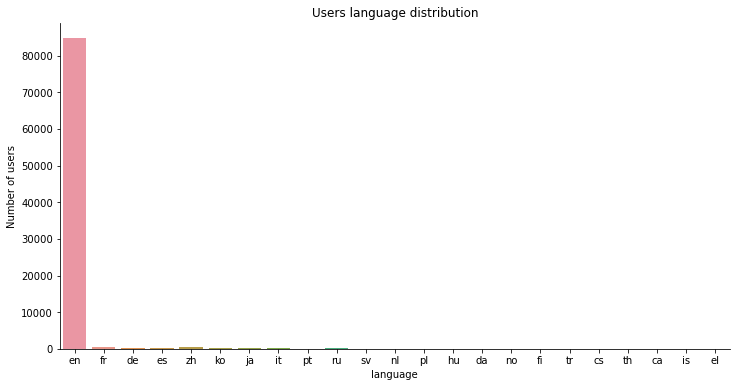

In [231]:
# country 변수 추가 
df_country=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/countries.csv")



merge_c = pd.merge(df,df_country, how='left', left_on='country_destination', right_on='country_destination')




merge_c=merge_c.drop(['lat_destination','lng_destination'],axis=1)

#결측치 제거 !! maybe other 지역 
merge_c=merge_c.dropna(axis=0)

merge_c=merge_c.drop(['language_levenshtein_distance'],axis=1)


import seaborn as sns

df_without_NDF = df[df['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

# 즉 다른 나라의 언어는 영어면 장땡이다. 즉 다른 나라의 언어 변수가 크게 영향을 안끼칠거라는 생각이든다
# 언어 관련 변수의 영향력은 그렇게 크지 않을꺼 같다.

merge_c=merge_c.drop(['destination_language ','language'],axis=1)

In [232]:
merge_c.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'country_destination', 'cat_duration',
       'distance_km', 'destination_km2'],
      dtype='object')

In [235]:
merge_final = pd.merge(merge_c,session_final, how='inner',on='id')



In [237]:
merge_final.isnull().sum()

id                                       0
gender                                   0
age                                      0
signup_method                            0
signup_flow                              0
affiliate_channel                        0
affiliate_provider                       0
first_affiliate_tracked                  0
signup_app                               0
first_browser                            0
country_destination                      0
cat_duration                             0
distance_km                              0
destination_km2                          0
action_count                             0
total_secs                               0
action                                   0
action_type                              0
action_detail                            0
device_type                              0
action_detail_user_listings              0
action_detail_p5                         0
action_detail_p3                         0
action_deta

In [238]:
merge_final.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'country_destination', 'cat_duration',
       'distance_km', 'destination_km2', 'action_count', 'total_secs',
       'action', 'action_type', 'action_detail', 'device_type',
       'action_detail_user_listings', 'action_detail_p5', 'action_detail_p3',
       'action_detail_message_post', 'action_detail_p1',
       'action_detail_update_user_profile',
       'action_detail_profile_verifications',
       'action_detail_cancellation_policies', 'action_detail_your_trips',
       'action_detail_create_phone_numbers',
       'action_detail_wishlist_content_update', 'action_detail_pending',
       'action_detail_message_thread', 'action_detail_update_listing',
       'action_detail_view_search_results'],
      dtype='object')

In [239]:
merge_final=merge_final.drop(['action_detail','country_destination'],axis=1)

In [240]:
merge_final.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'cat_duration', 'distance_km',
       'destination_km2', 'action_count', 'total_secs', 'action',
       'action_type', 'device_type', 'action_detail_user_listings',
       'action_detail_p5', 'action_detail_p3', 'action_detail_message_post',
       'action_detail_p1', 'action_detail_update_user_profile',
       'action_detail_profile_verifications',
       'action_detail_cancellation_policies', 'action_detail_your_trips',
       'action_detail_create_phone_numbers',
       'action_detail_wishlist_content_update', 'action_detail_pending',
       'action_detail_message_thread', 'action_detail_update_listing',
       'action_detail_view_search_results'],
      dtype='object')

In [242]:
merge_final

id  gender        age signup_method  signup_flow  \
0      4rvqpxoh3h  FEMALE  36.048687         basic           25   
1      xwxei6hdk4  FEMALE  32.000000      facebook            0   
2      awiurksqr3  FEMALE  32.000000      facebook            0   
3      jrqykh9y8x  FEMALE  27.000000      facebook            0   
4      s9xrwtyzsq    MALE  30.000000         basic            0   
...           ...     ...        ...           ...          ...   
25075  7plqriggxp  FEMALE  55.000000         basic            0   
25076  msucfwmlzc    MALE  43.000000         basic            0   
25077  omlc9iku7t  FEMALE  34.000000         basic            0   
25078  0k26r3mir0  FEMALE  36.000000         basic            0   
25079  qbxza0xojf  FEMALE  23.000000         basic            0   

      affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
0                direct             direct               untracked        iOS   
1                   seo             google                  linked        Web   
2                direct             direct               untracked        Web   
3                   seo             google                  linked        Web   
4             sem-brand             google                     omg        Web   
...                 ...                ...                     ...        ...   
25075         sem-brand             google                     omg        Web   
25076            direct             direct               untracked        Web   
25077            direct             direct                  linked        Web   
25078         sem-brand             google                  linked        Web   
25079         sem-brand             google                     omg        Web   

       first_browser  ... action_detail_update_user_profile  \
0          -unknown-  ...                                 0   
1      Mobile Safari  ...                                 0   
2      Mobile Safari  ...                                 0   
3             Chrome  ...                                 0   
4      Mobile Safari  ...                                 1   
...              ...  ...                               ...   
25075             IE  ...                                 0   
25076        Firefox  ...                                 0   
25077         Chrome  ...                                 0   
25078         Safari  ...                                 0   
25079             IE  ...                                 0   

       action_detail_profile_verifications  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        4   
...                                    ...   
25075                                    0   
25076                                    0   
25077                                    0   
25078                                    0   
25079                                    0   

       action_detail_cancellation_policies  action_detail_your_trips  \
0                                        0                         0   
1                                        0                         0   
2                                        0                         0   
3                                        0                         1   
4                                        0                         1   
...                                    ...                       ...   
25075                                    0                         0   
25076                                    2                         0   
25077                                    0                         0   
25078                                    0                         0   
25079                                    0                         0   

       action_detail_create_phone_numbers  \
0                

In [243]:
catvar=['gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'cat_duration','action', 'action_type', 'device_type']

In [245]:
# 더미 데이터 
for c in catvar:
    temp=pd.get_dummies(merge_final[c],prefix=c, drop_first=True)
    merge_final=pd.concat((merge_final,temp),axis=1)

merge_final=merge_final.drop(catvar,axis=1)


In [247]:
merge_final=merge_final.drop(['id'],axis=1)

In [249]:
target=merge_final[['cat_duration_S']]

In [250]:
merge_final=merge_final.drop(['cat_duration_S'],axis=1)

In [251]:
target

cat_duration_S
0                   0
1                   1
2                   0
3                   1
4                   0
...               ...
25075               0
25076               1
25077               1
25078               1
25079               0

[25080 rows x 1 columns]

In [132]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     28.52
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:08:48   Log-Likelihood:                -54552.
No. Observations:               77003   AIC:                         1.093e+05
Df Residuals:                   76910   BIC:                         1.101e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0006      0.000     -3.376      0.001      -0.001      -0.000
x2          7.126e-05   1.12e-05      6.348      0.000    4.93e-05    9.33e-05
x3          1.848e-08   3.54e-09      5.225      0.000    1.15e-08    2.54e-08
x4            -0.0421      0.004    -11.794      0.000      -0.049      -0.035
x5             0.0776      0.004     18.808      0.000       0.070       0.086
x6             0.0471      0.069      0.686      0.493      -0.087       0.182
x7             0.4594      0.041     11.221      0.000       0.379       0.540
x8             0.0681      0.010      6.961      0.000       0.049       0.087
x9            -0.2379      0.008    -30.709      0.000      -0.253      -0.223
x10            0.4158      0.348      1.195      0.232      -0.266       1.098
x11            0.1278      0.072      1.784      0.074      -0.013       0.268
x12           -0.0463      0.053     -0.882      0.378      -0.149       0.057
x13           -0.4904      0.492     -0.997      0.319      -1.455       0.474
x14           -0.0355      0.044     -0.802      0.422      -0.122       0.051
x15            0.2479      0.246      1.006      0.314      -0.235       0.731
x16           -0.6133      0.348     -1.762      0.078      -1.295       0.069
x17            0.4554      0.348      1.308      0.191      -0.227       1.138
x18            0.1612      0.058      2.795      0.005       0.048       0.274
x19           -0.0384      0.038     -1.021      0.307      -0.112       0.035
x20           -0.0530      0.026     -2.065      0.039      -0.103      -0.003
x21            0.0420      0.025      1.683      0.092      -0.007       0.091
x22            0.2044      0.060      3.395      0.001       0.086       0.322
x23           -0.1530      0.070     -2.172      0.030      -0.291      -0.015
x24            0.0177      0.043      0.415      0.678      -0.066       0.102
x25            0.1839      0.062      2.983      0.003       0.063       0.305
x26            0.0768      0.055      1.387      0.166      -0.032       0.185
x27            0.0739      0.055      1.334      0.182      -0.035       0.183
x28            0.0802      0.055      1.468      0.142      -0.027       0.187
x29           -0.5483      0.187     -2.935      0.003      -0.914      -0.182
x30           -0.4202      0.191     -2.204      0.028      -0.794      -0.047
x31           -0.2809      0.128     -2.193      0.028      -0.532      -0.030
x32           -0.4775      0.210     -2.277      0.023      -0.888      -0.067
x33           -0.5373      0.187     -2.872      0.004      -0.904      -0.171
x34           -0.3839      0.195     -1.967      0.049      -0.767      -0.001
x35           -0.5219      0.186     -2.807      0.005      -0.886      -0.157
x36           -0.2264      0.208     -1.089      0.276      -0.634       0.181
x3

In [252]:
merge_final.columns

Index(['distance_km', 'destination_km2', 'action_count', 'total_secs',
       'action_detail_user_listings', 'action_detail_p5', 'action_detail_p3',
       'action_detail_message_post', 'action_detail_p1',
       'action_detail_update_user_profile',
       ...
       'device_type_Blackberry', 'device_type_Chromebook',
       'device_type_Linux Desktop', 'device_type_Mac Desktop',
       'device_type_Tablet', 'device_type_Windows Desktop',
       'device_type_Windows Phone', 'device_type_iPad Tablet',
       'device_type_iPhone', 'device_type_iPodtouch'],
      dtype='object', length=278)

In [253]:
merge_final['const']=0

In [254]:

#변수 선택법

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

 

import time
import itertools


def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}


def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])


Forward_best_model = forward_model(merge_final,target.values)


Processed  278 models on 1 predictors in 1.0532100200653076
Selected predictors: ['destination_km2', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f773b634430>
Processed  277 models on 2 predictors in 1.254073143005371
Selected predictors: ['destination_km2', 'distance_km', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f7733cb49d0>
Processed  276 models on 3 predictors in 1.4881017208099365
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772cae54c0>
Processed  275 models on 4 predictors in 1.4603872299194336
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f773b6349a0>
Processed  274 models on 5 predictors in 1.605003833

Processed  259 models on 20 predictors in 5.536243915557861
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f773bd9e4c0>
Processed  258 models on 21 predictors in 5.948078155517578
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_fo

Processed  249 models on 30 predictors in 10.02501916885376
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'action_update', 'action_detail_cancellation_policies', 'action_detail_p3', 'action_detail_view_search_results', 'action_show', 'action_personalize', 'action_authenticate', 'first_affiliate_tracked_untracked', 'action_complete_status', 'action_active', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f773bd8a340>
Processed  248 models on 31 predict

Processed  241 models on 38 predictors in 9.318871021270752
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'action_update', 'action_detail_cancellation_policies', 'action_detail_p3', 'action_detail_view_search_results', 'action_show', 'action_personalize', 'action_authenticate', 'first_affiliate_tracked_untracked', 'action_complete_status', 'action_active', 'action_type_view', 'action_type_data', 'action_type_click', 'action_type_submit', 'action_type_message_post', 'action_ajax_get_referrals_

Processed  234 models on 45 predictors in 13.177239894866943
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'action_update', 'action_detail_cancellation_policies', 'action_detail_p3', 'action_detail_view_search_results', 'action_show', 'action_personalize', 'action_authenticate', 'first_affiliate_tracked_untracked', 'action_complete_status', 'action_active', 'action_type_view', 'action_type_data', 'action_type_click', 'action_type_submit', 'action_type_message_post', 'action_ajax_get_referrals

Processed  227 models on 52 predictors in 13.476014852523804
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'action_update', 'action_detail_cancellation_policies', 'action_detail_p3', 'action_detail_view_search_results', 'action_show', 'action_personalize', 'action_authenticate', 'first_affiliate_tracked_untracked', 'action_complete_status', 'action_active', 'action_type_view', 'action_type_data', 'action_type_click', 'action_type_submit', 'action_type_message_post', 'action_ajax_get_referrals

Processed  221 models on 58 predictors in 14.59981107711792
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'action_update', 'action_detail_cancellation_policies', 'action_detail_p3', 'action_detail_view_search_results', 'action_show', 'action_personalize', 'action_authenticate', 'first_affiliate_tracked_untracked', 'action_complete_status', 'action_active', 'action_type_view', 'action_type_data', 'action_type_click', 'action_type_submit', 'action_type_message_post', 'action_ajax_get_referrals_

Processed  216 models on 63 predictors in 22.407917022705078
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'action_update', 'action_detail_cancellation_policies', 'action_detail_p3', 'action_detail_view_search_results', 'action_show', 'action_personalize', 'action_authenticate', 'first_affiliate_tracked_untracked', 'action_complete_status', 'action_active', 'action_type_view', 'action_type_data', 'action_type_click', 'action_type_submit', 'action_type_message_post', 'action_ajax_get_referrals

Processed  211 models on 68 predictors in 15.566248178482056
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'action_update', 'action_detail_cancellation_policies', 'action_detail_p3', 'action_detail_view_search_results', 'action_show', 'action_personalize', 'action_authenticate', 'first_affiliate_tracked_untracked', 'action_complete_status', 'action_active', 'action_type_view', 'action_type_data', 'action_type_click', 'action_type_submit', 'action_type_message_post', 'action_ajax_get_referrals

Processed  206 models on 73 predictors in 20.053433895111084
Selected predictors: ['destination_km2', 'distance_km', 'action_detail_pending', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'signup_method_facebook', 'signup_app_iOS', 'signup_app_Web', 'signup_flow_23', 'signup_app_Moweb', 'device_type_Android App Unknown Phone/Tablet', 'age_36.048687350835316', 'device_type_Android Phone', 'action_detail_wishlist_content_update', 'action_count', 'action_search_results', 'signup_method_google', 'action_update', 'action_detail_cancellation_policies', 'action_detail_p3', 'action_detail_view_search_results', 'action_show', 'action_personalize', 'action_authenticate', 'first_affiliate_tracked_untracked', 'action_complete_status', 'action_active', 'action_type_view', 'action_type_data', 'action_type_click', 'action_type_submit', 'action_type_message_post', 'action_ajax_get_referrals

KeyboardInterrupt: 

In [141]:
Forward_best_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                -135.779
Model:                            OLS   Adj. R-squared (uncentered):           -135.859
Method:                 Least Squares   F-statistic:                             -1698.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        1.00
Time:                        18:19:54   Log-Likelihood:                         -54568.
No. Observations:               77003   AIC:                                  1.092e+05
Df Residuals:                   76958   BIC:                                  1.096e+05
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
age                                      -0.0006      0.000     -3.458      0.001      -0.001      -0.000
signup_method_facebook                    0.0774      0.004     18.832      0.000       0.069       0.085
affiliate_channel_direct                 -0.0615      0.024     -2.589      0.010      -0.108      -0.015
affiliate_provider_google                -0.0726      0.024     -3.008      0.003      -0.120      -0.025
affiliate_provider_other                 -0.0547      0.025     -2.198      0.028      -0.103      -0.006
signup_flow_3                            -0.2379      0.008    -30.845      0.000      -0.253      -0.223
affiliate_provider_craigslist            -0.0297      0.027     -1.091      0.275      -0.083       0.024
affiliate_provider_facebook              -0.0852      0.030     -2.802      0.005      -0.145      -0.026
affiliate_provider_bing                  -0.0981      0.030     -3.258      0.001      -0.157      -0.039
signup_flow_25                            0.0395      0.024      1.619      0.105      -0.008       0.087
affiliate_provider_padmapper              0.0556      0.040      1.383      0.167      -0.023       0.134
distance_km                               0.0001   5.67e-06     19.703      0.000       0.000       0.000
country_destination_US                    1.8425      0.104     17.735      0.000       1.639       2.046
country_destination_CA                    1.5540      0.091     17.147      0.000       1.376       1.732
destination_km2                       -1.093e-07   6.92e-09    -15.787      0.000   -1.23e-07   -9.57e-08
gender_MALE                              -0.0425      0.004    -11.916      0.000      -0.049      -0.035
country_destination_IT                   -0.1194      0.015     -8.151      0.000      -0.148      -0.091
signup_flow_1                             0.4590      0.041     11.221      0.000       0.379       0.539
signup_flow_2                             0.0679      0.010      6.969      0.000       0.049       0.087
affiliate_channel_content                 0.1296      0.025      5.208      0.000       0.081       0.178
signup_flow_23                           -0.0404      0.037     -1.079      0.281      -0.114       0.033
country_destination_FR                    0.0735      0.011      6.912      0.000       0.053       0.094
country_destination_GB                    0.0767      0.013      5.710      0.000       0.050       0.103
affiliate_provider_meetup                 0.3469      0.081      4.265      0.000       0.187       0.506
affiliate_channel_remarketing             0.1070      0.028      3.819      0.000       0.052       0.162
signup_app_iOS  

In [157]:
sel_FW1=list(Forward_best_model.params.index)


In [158]:
merge_c=merge_c[sel_FW1]

In [161]:
merge_final = pd.merge(merge_c,id_m, how='left', left_on=merge_c.index, right_on=id_m.index)


In [163]:
merge_final2=pd.merge(merge_final,session_final,how='inner',on='id')

In [178]:
merge_final2

array([[0.32382596, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26153846, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26153846, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29230769, 0.        , 1.        , ..., 0.        , 0.        ,
        0.01567398],
       [0.32307692, 0.        , 0.        , ..., 0.0199005 , 0.02259887,
        0.05956113],
       [0.12307692, 0.        , 0.        , ..., 0.        , 0.        ,
        0.05015674]])

In [166]:
catvar2=['action','action_type','action_detail','device_type']

In [177]:
# 더미 데이터 
for c in catvar2:
    temp=pd.get_dummies(merge_final2,prefix=c, drop_first=True)
    merge_final_2=pd.concat((merge_final2,temp),axis=1)

merge_final2=merge_final2.drop(catvar2,axis=1)

Exception: Data must be 1-dimensional

In [176]:
merge_final2=merge_final2.drop(['id'],axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [ ]:

#변수 선택법

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

 

import time
import itertools


def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}


def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])


Forward_best_model2 = forward_model(merge_final,target.values)
